<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#CS4423---Networks" data-toc-modified-id="CS4423---Networks-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>CS4423 - Networks</a></span></li></ul></li><li><span><a href="#News" data-toc-modified-id="News-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>News</a></span></li><li><span><a href="#Graphs" data-toc-modified-id="Graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Graphs</a></span><ul class="toc-item"><li><span><a href="#An-example:-the-Internet-(circa-1970)" data-toc-modified-id="An-example:-the-Internet-(circa-1970)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>An example: the Internet (circa 1970)</a></span></li></ul></li><li><span><a href="#Simple-Graphs" data-toc-modified-id="Simple-Graphs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simple Graphs</a></span></li><li><span><a href="#Simple-Graphs-in-networkx" data-toc-modified-id="Simple-Graphs-in-networkx-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simple Graphs in <code>networkx</code></a></span><ul class="toc-item"><li><span><a href="#Importing-the-package" data-toc-modified-id="Importing-the-package-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Importing the package</a></span></li><li><span><a href="#Making-a-graph:" data-toc-modified-id="Making-a-graph:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Making a graph:</a></span></li><li><span><a href="#Adding-and-removing-nodes-and-edges" data-toc-modified-id="Adding-and-removing-nodes-and-edges-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Adding and removing nodes and edges</a></span></li><li><span><a href="#Subgraphs-and-Induced-subgraphs" data-toc-modified-id="Subgraphs-and-Induced-subgraphs-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Subgraphs and Induced subgraphs</a></span></li></ul></li><li><span><a href="#Important-Graphs" data-toc-modified-id="Important-Graphs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Important Graphs</a></span><ul class="toc-item"><li><span><a href="#Complete-Graphs" data-toc-modified-id="Complete-Graphs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Complete Graphs</a></span></li><li><span><a href="#Petersen-Graph" data-toc-modified-id="Petersen-Graph-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Petersen Graph</a></span></li></ul></li><li><span><a href="#Code-Corner" data-toc-modified-id="Code-Corner-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Code Corner</a></span><ul class="toc-item"><li><span><a href="#python" data-toc-modified-id="python-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><code>python</code></a></span></li><li><span><a href="#networkx" data-toc-modified-id="networkx-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><code>networkx</code></a></span></li><li><span><a href="#itertools" data-toc-modified-id="itertools-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span><code>itertools</code></a></span></li></ul></li></ul></div>

### CS4423 - Networks
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway

(These notes are adapted from Angela Carnecale's work)

This notebook is at: https://www.niallmadden.ie/2425-CS4423/W01/CS4423-W01-2.ipynb

# Week 1, Lecture 2: 
# Graphs and `networkx`

In [1]:
import networkx as nx

## News

1. Still working on confirming the lab times. We'll certainly have a lab session, Wednesday at 10am in CA116a.

Tuesday at 4 in AC215 is suboptimal... let's see if we can improve on that...

After that, we'll review some of the slides I didn't cover on Wednesday (see https://universityofgalway.instructure.com/courses/31889/files?preview=2325934)

## Graphs


A **graph** can serve as a mathematical model of a network.

Later, we will use the `networkx` package to work with examples of graphs and networks.

This notebook gives an introduction into graph theory, along with some basic, useful
  `networkx` commands.



###  An example: the Internet (circa 1970)

**Example.**  The internet (more precisely, [ARPANET](https://en.wikipedia.org/wiki/ARPANET)) in December 1970.  Nodes are computers,
connected by a link if they can directly communicate with each other.
At the time, only 13 computers participated in that network. 

![the internet in december 1970](https://d1vq4hxutb7n2b.cloudfront.net/system/files/53b5c1/66342b8248f70002ea/h_1536/f7dec1970.jpg)

In [2]:
!cat ../data/arpa.adj

UCSB SRI UCLA
SRI UCLA STAN UTAH
UCLA STAN RAND
UTAH SDC MIT
RAND SDC BBN
MIT BBN LINC
BBN HARV
LINC CASE
HARV CARN
CASE CARN


The very first ARPANET network was even smaller, with node 1 being [UCLA](https://100.ucla.edu/timeline/the-internets-first-message-sent-from-ucla) and node 2 being SRI. The first ever message was sent on 29 October 1969. The intended message was "Login" but things didn't quite work and the computers crashed just after the more prophetic message "Lo" was displayed...

The following **diagram**, built from the adjacencies in the list,
contains the same information, without the distracting details of the
US geography! (This is actually an important point: networks reflect only the *topology* of the object being studied).   Also - don't worry about the syntax: we'll come back to that later!

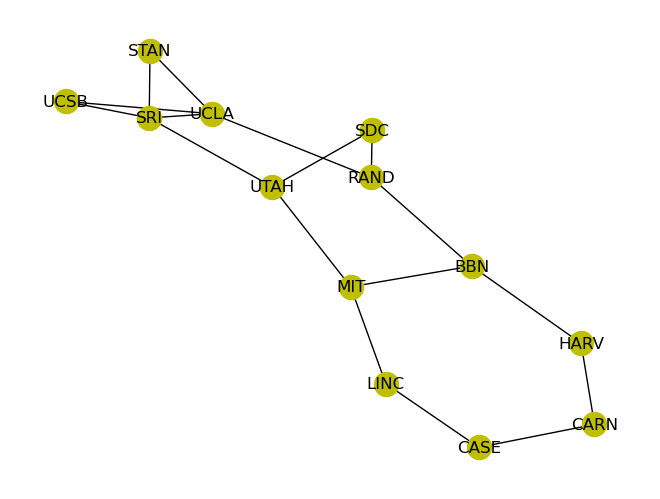

In [3]:
H = nx.read_adjlist("../data/arpa.adj")
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(H, **opts)

## Simple Graphs


**Definition.** A (simple) **graph**
is a pair $G = (X, E)$, consisting of a (finite) set $X$ of
    objects, called **nodes** or **vertices** or **points**,
and $E$ is the of **links** or **edges**; every edge is a set consisting of two different vertices.
    
We can also write $E \subseteq \binom{X}{2}$, where $\binom{X}{2}$, pronounced as "_$X$ choose 2_", is the set of all $2$-element subsets of $X$.    

Usually, $n$ is used to denote the number of vertices of a graph,
$n = |X|$,
and $m$ for the number of edges, $m = |E|$.

$n = |X|$ is called the **order** of the graph $G$, and $m = |E|$ is called the  **size** of $G$.


The notation $\binom{X}{2}$ for the set of all $2$-element subsets of $X$ is 
motivated by the fact that if $X$ has $n$ elements then
$\binom{X}{2}$ has $\binom{n}{2} = \frac{1}{2} n(n-1)$ elements:
$$\left|\binom{X}{2}\right| = \binom{|X|}{2}.$$
Obviously, $m \leq \binom{n}{2}$.

**Example.**

$G=(X,E)$ with $X = \{ A, B, C, D \}$ and $E = \{ \{AB\}, \{BC\}, \{BD\}, \{CD\} \}$. 
**Notation:** usually we'll be a bit lazy and write $\{ A, B \}$) as just $AB$. So  $E = \{ AB, BC, BD, CD \}$. 

So $G$ is a graph of order $4$ and size $4$.

In [4]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

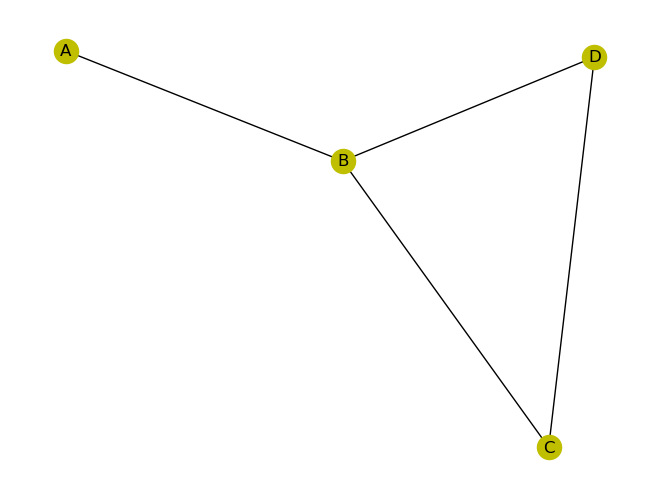

In [5]:
nx.draw(G, **opts)

##  Simple Graphs in `networkx`

### Importing the package
We'll use the Python package `networkx` to work with graphs. So, from now on, every notebook with begin with:

In [6]:
import networkx as nx
opts = { "with_labels": True, "node_color": 'y' } # show labels; yellow noodes

### Making a graph:
In `networkx`, we can construct this graph with the `Graph` constructor function, which takes the
node and edge sets $X$ and $E$ in a variety of formats.  

The simplest approach is to use  $2$-letter strings for the edges: this implicitly defines the nodes too. 

Here is our graph from earlier: 

In [7]:
G = nx.Graph(["AB", "BC", "BD", "CD"])
G 

* The `python` object `G` representing the graph $G$ has lots of useful attributes.  Firstly, it has `nodes` and `edges`.

In [8]:
G.nodes

NodeView(('A', 'B', 'C', 'D'))

In [9]:
list(G.nodes)

['A', 'B', 'C', 'D']

In [10]:
G.edges

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [11]:
list(G.edges)

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

A **loop** over a graph `G` will effectively loop over `G`'s nodes. As an example, (recall?) that the **degree** of a node is the number of edges incident to it (or, if you prefer, the number of neighbours).

In [12]:
for node in G:
    print(f"node {node} has degree {G.degree(node)}")

node A has degree 1
node B has degree 3
node C has degree 2
node D has degree 2


We can count the nodes, and the edges.

In [13]:
G.number_of_nodes()

4

In [14]:
G.order()

4

In [15]:
G.number_of_edges()

4

In [16]:
G.size()

4

To draw the graph:

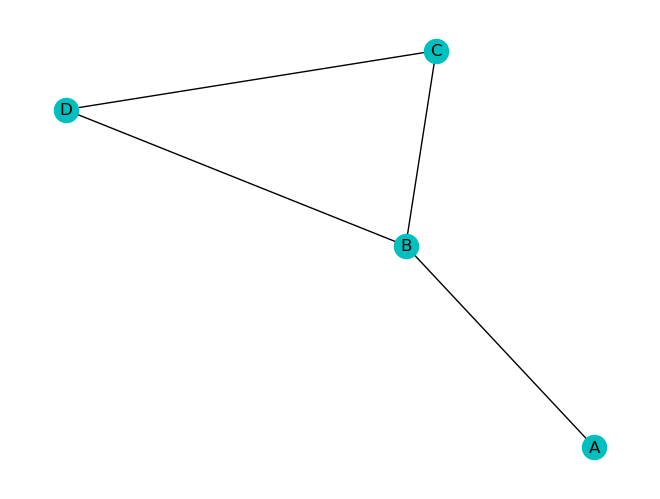

In [17]:
nx.draw(G, **{ "with_labels": True, "node_color": 'c'})

The example also illustrates a typical way how diagrams of graphs are drawn:
nodes are represented by small circles, and edges by lines connecting the nodes.

### Adding and removing nodes and edges
A graph `G` can be modified, by adding nodes one at a time ...

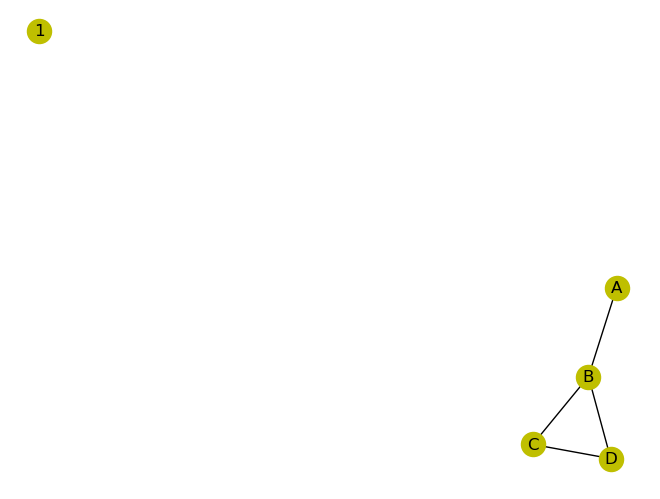

In [18]:
G.add_node(1)
list(G.nodes)
nx.draw(G, **opts)

or many nodes at once ...

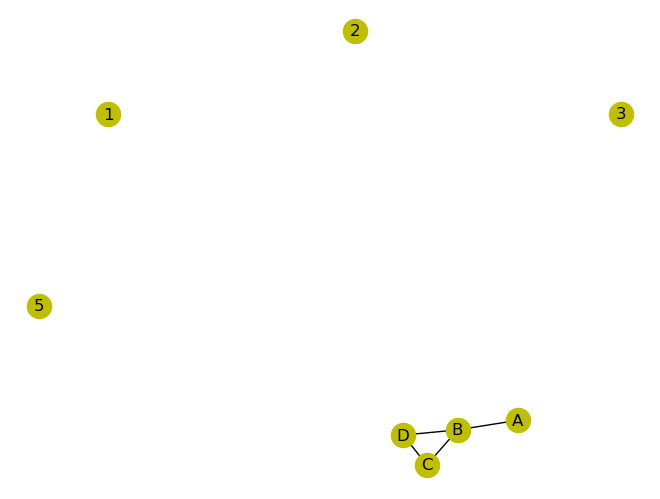

In [19]:
G.add_nodes_from([2, 3, 5])
list(G.nodes)
nx.draw(G, **opts)

* ... or even as nodes of another graph `H`

In [20]:
G.add_nodes_from(H)
list(G.nodes)

['A',
 'B',
 'C',
 'D',
 1,
 2,
 3,
 5,
 'UCSB',
 'SRI',
 'UCLA',
 'STAN',
 'UTAH',
 'RAND',
 'SDC',
 'MIT',
 'BBN',
 'LINC',
 'HARV',
 'CASE',
 'CARN']

In [21]:
G.order(), G.size()

(21, 4)

Adding edges works in a similar fashion

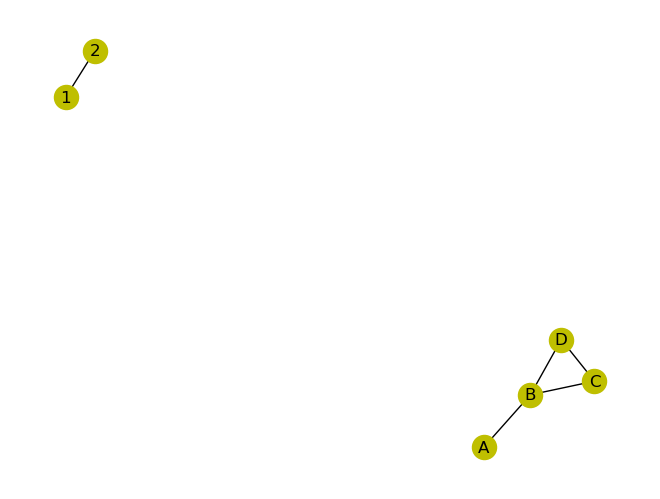

In [22]:
G=nx.Graph( ["AB", "BC", "BD", "DC"] )
G.add_edge(1,2)
#G.add_edge(1,'C')
#G.add_edge(1,'A')
list(G.edges)
nx.draw(G, **opts)

In [23]:
#edge = (2,3)
#G.add_edge(*edge)
#list(G.edges)

Add edges from a list:

In [24]:
G.add_edges_from([(1,5), (2,5), (3,5)])
list(G.edges)

[('A', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'D'),
 (1, 2),
 (1, 5),
 (2, 5),
 (5, 3)]

Add edges from another graph:

In [25]:
G.add_edges_from(H.edges)
list(G.edges)

[('A', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'D'),
 (1, 2),
 (1, 5),
 (2, 5),
 (5, 3),
 ('UCSB', 'SRI'),
 ('UCSB', 'UCLA'),
 ('SRI', 'UCLA'),
 ('SRI', 'STAN'),
 ('SRI', 'UTAH'),
 ('UCLA', 'STAN'),
 ('UCLA', 'RAND'),
 ('UTAH', 'SDC'),
 ('UTAH', 'MIT'),
 ('RAND', 'SDC'),
 ('RAND', 'BBN'),
 ('MIT', 'BBN'),
 ('MIT', 'LINC'),
 ('BBN', 'HARV'),
 ('LINC', 'CASE'),
 ('HARV', 'CARN'),
 ('CASE', 'CARN')]

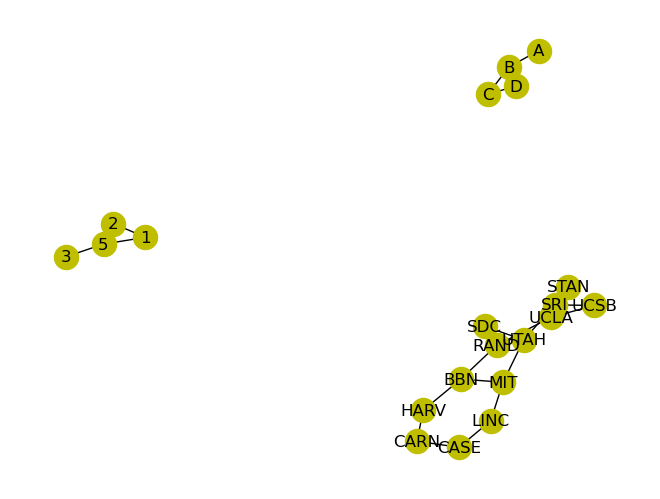

In [26]:
nx.draw(G, **opts)

There are corresponding commands for **removing** nodes or edges from a graph `G`

In [27]:
G.order(), G.size()

(21, 25)

In [28]:
G.remove_edge(3,5)
G.order(), G.size()

(21, 24)

In [29]:
G.remove_edges_from(H.edges())
G.order(), G.size()

(21, 7)

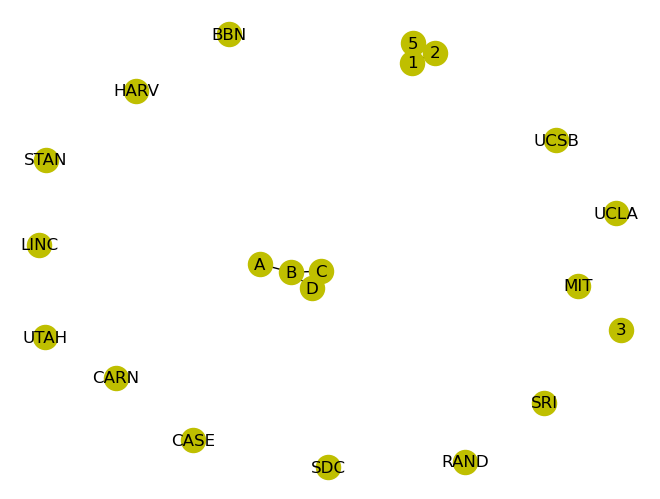

In [30]:
nx.draw(G, **opts)

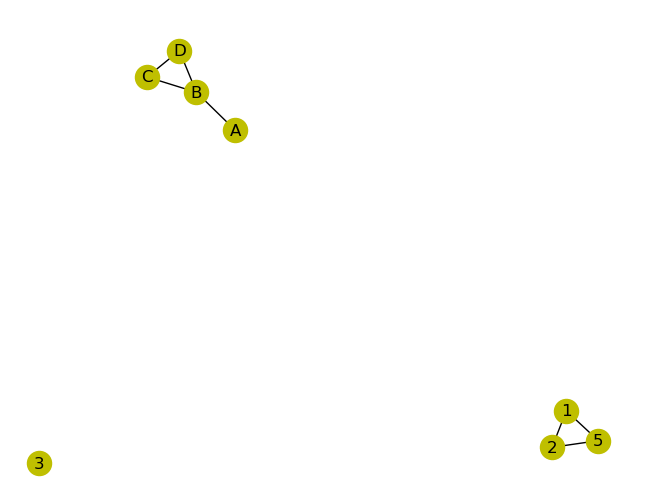

In [31]:
G.remove_nodes_from(H)
nx.draw(G, **opts)

* Removing a node will silently delete all edges it forms part of

In [32]:
G.remove_nodes_from([1, 2, 3, 5])
G.order(), G.size()

(4, 4)

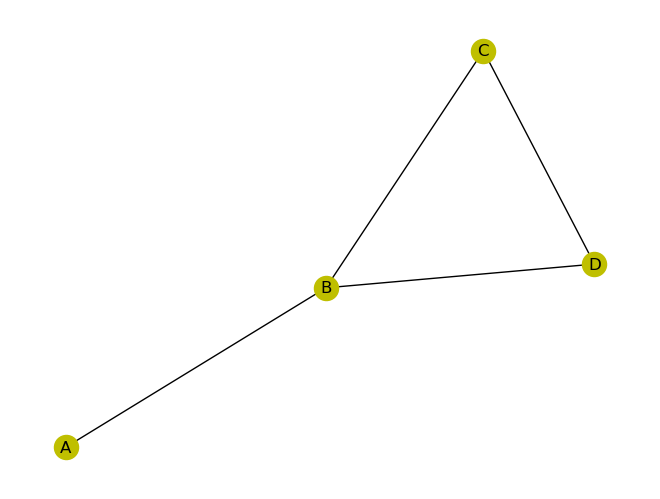

In [33]:
nx.draw(G, **opts)

That is, `networkx` is ensuring what we get is a proper graph, which is a subgraph of the original one.


<div class="alert alert-block alert-info">Finished here Thursday</div>

### Subgraphs and Induced subgraphs

Given $G=(X,E)$, a **subgraph** of $G$ is $H=(Y,E_H)$ with $Y\subseteq X$ and $E_H\subseteq E\cap \binom{Y}{2}$.

So, all the nodes in $H$ are also in $G$. And any edge in $H$ was also in $G$, and is incident only to vertices in $Y$.

One of the most important subgraphs of $G$ is the **induced subgraph** on $Y\subseteq X$ is the graph $H=\left(Y,E\cap \binom{Y}{2}\right)$. That is, given a subset $Y$ of $X$, we include *all possible edges* from $G$ too.


* Each node has a list of **neighbours**, the nodes it is
  directly connected to by an edge of the graph.

In [34]:
list(G.neighbors('B'))

['A', 'C', 'D']

In [35]:
G['B']

AtlasView({'A': {}, 'C': {}, 'D': {}})

In [36]:
list(G['B'])

['A', 'C', 'D']

As mentioned earlier, the number of neighbours of a node $x$ is its **degree**

In [37]:
G.degree('B')

3

In [38]:
G.degree

DegreeView({'A': 1, 'B': 3, 'C': 2, 'D': 2})

In [39]:
list(G.degree)

[('A', 1), ('B', 3), ('C', 2), ('D', 2)]

Anybody knows/remembers a fundamental relationship between (the sum of) the degrees and the size of a graph?

## Important Graphs

### Complete Graphs

The [**complete graph**](https://en.wikipedia.org/wiki/Complete_graph)
on a vertex set $X$ is the graph with edge set all of $\binom{X}{2}$. E.g., if $X=\{0,1,2,3\}$, then $E=\{01, 02, 03, 12, 13, 23\}$.

In [40]:
nodes = range(4)
list(nodes)

[0, 1, 2, 3]

In [41]:
E4 = [(x, y) for x in nodes for y in nodes if x < y]
print(E4)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


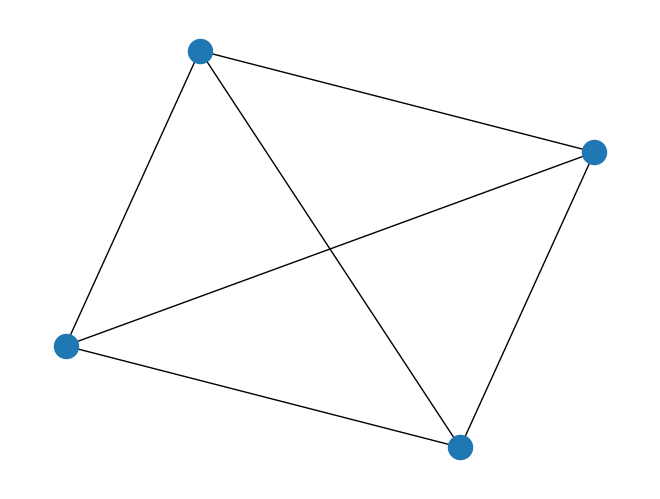

In [42]:
K4 = nx.Graph(E4)
nx.draw(K4)

While it is somewhat straightforward to find all $2$-element
subsets of a given set $X$ with a short `python` program,
it is probably more convenient (and possibly efficient) to use a function from the
`itertools` package for this purpose.

In [43]:
from itertools import combinations
nodes5 = range(5)
combinations(nodes5, 2)

In [44]:
print(list(combinations(nodes5, 2)))

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [45]:
K5 = nx.Graph(combinations(nodes5, 2))

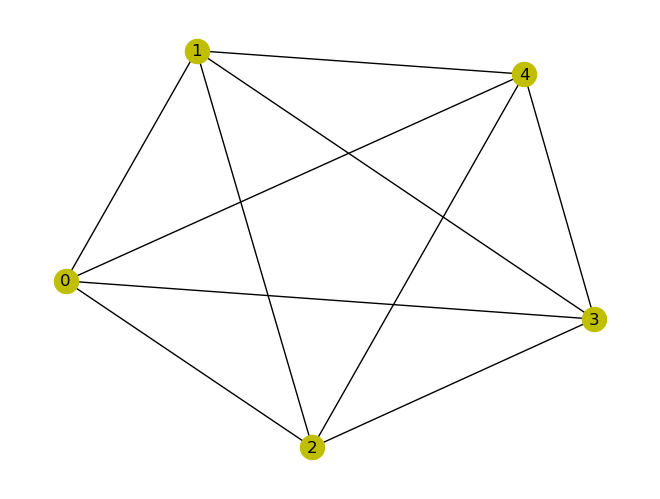

In [46]:
nx.draw(K5, **opts)

We can turn this procedure into a `python` function that
constructs the complete graph for an arbitrary vertex set $X$.

In [47]:
def complete_graph(nodes):
    return nx.Graph(combinations(nodes, 2))

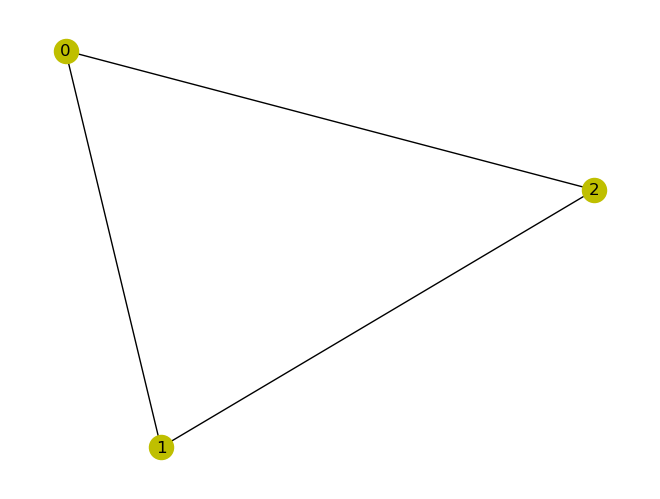

In [48]:
nx.draw(complete_graph(range(3)), **opts)

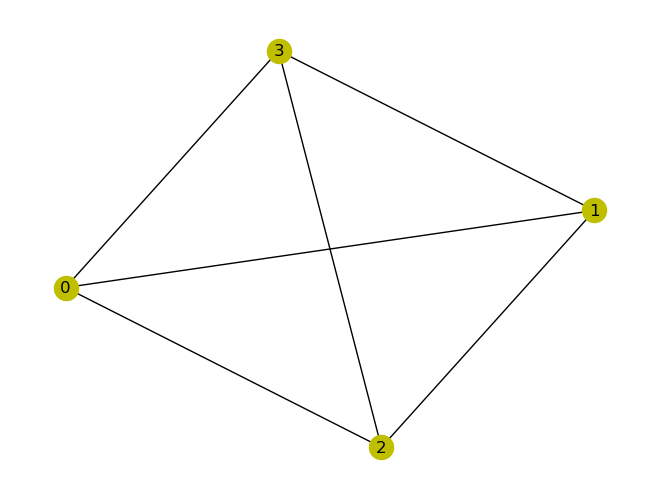

In [49]:
nx.draw(complete_graph(range(4)), **opts)

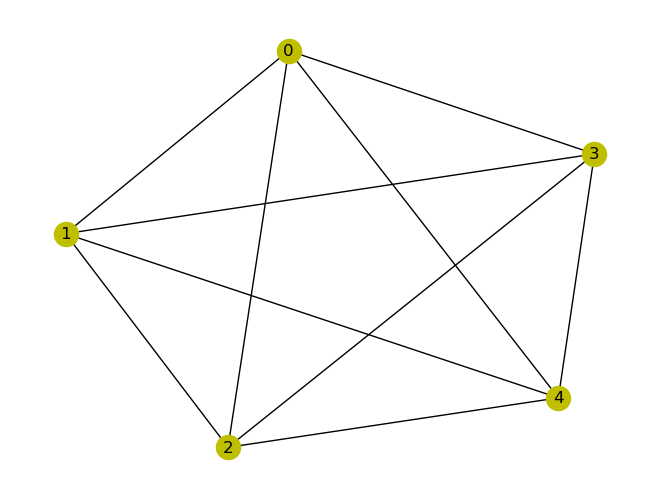

In [50]:
nx.draw(complete_graph(range(5)), **opts)

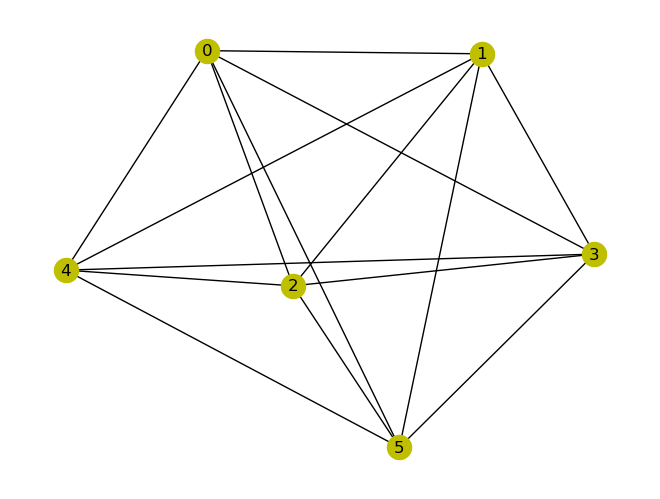

In [51]:
nx.draw(complete_graph(range(6)), **opts)

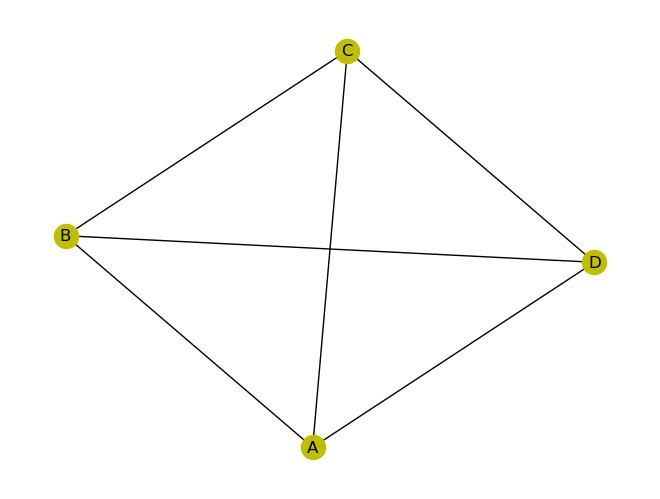

In [52]:
nx.draw(complete_graph("ABCD"), **opts)

In fact, `networkx` has its own implementation of complete graphs.

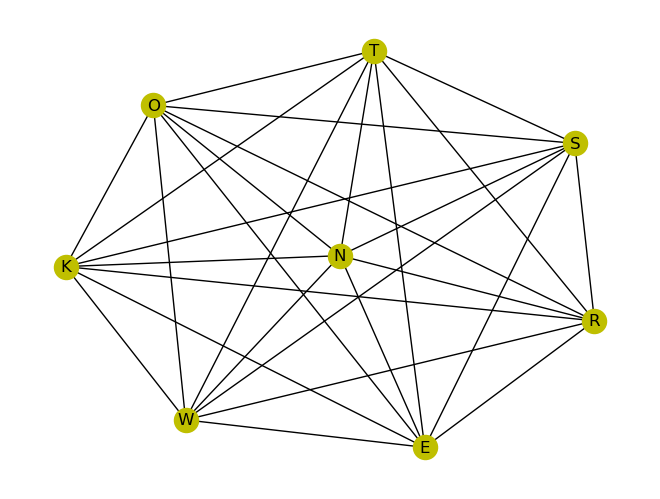

In [53]:
nx.draw(nx.complete_graph("NETWORKS"), **opts)

### Petersen Graph

The [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph)
is a graph on $10$ vertices with $15$ edges.

It can be constructed 
as the complement of the line graph of the complete graph $K_5$,
i.e.,
as the graph with vertex set
$$X = \binom{\{0,1,2,3,4\}}{2}$$ (the edge set of $K_5$) and
with an edge between $x, y \in X$ whenever $x \cap y = \emptyset$.

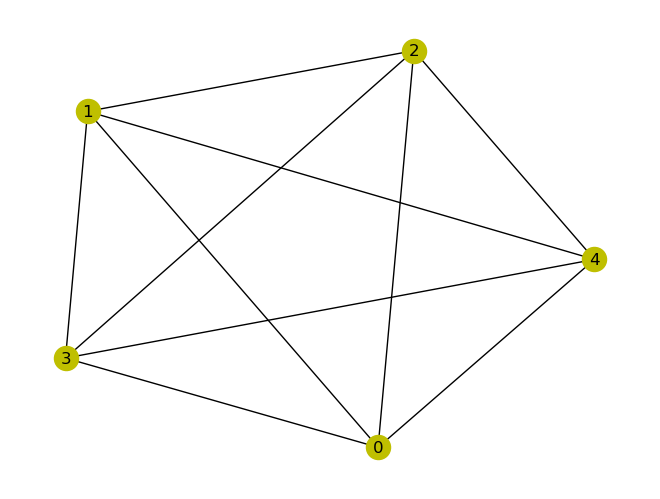

In [54]:
nx.draw(K5, **opts)

In [55]:
lines = K5.edges
print(list(lines))

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [56]:
print(list(combinations(lines, 2)))

[((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (1, 2)), ((0, 1), (1, 3)), ((0, 1), (1, 4)), ((0, 1), (2, 3)), ((0, 1), (2, 4)), ((0, 1), (3, 4)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (1, 2)), ((0, 2), (1, 3)), ((0, 2), (1, 4)), ((0, 2), (2, 3)), ((0, 2), (2, 4)), ((0, 2), (3, 4)), ((0, 3), (0, 4)), ((0, 3), (1, 2)), ((0, 3), (1, 3)), ((0, 3), (1, 4)), ((0, 3), (2, 3)), ((0, 3), (2, 4)), ((0, 3), (3, 4)), ((0, 4), (1, 2)), ((0, 4), (1, 3)), ((0, 4), (1, 4)), ((0, 4), (2, 3)), ((0, 4), (2, 4)), ((0, 4), (3, 4)), ((1, 2), (1, 3)), ((1, 2), (1, 4)), ((1, 2), (2, 3)), ((1, 2), (2, 4)), ((1, 2), (3, 4)), ((1, 3), (1, 4)), ((1, 3), (2, 3)), ((1, 3), (2, 4)), ((1, 3), (3, 4)), ((1, 4), (2, 3)), ((1, 4), (2, 4)), ((1, 4), (3, 4)), ((2, 3), (2, 4)), ((2, 3), (3, 4)), ((2, 4), (3, 4))]


In [57]:
edges = [e for e in combinations(lines, 2) 
           if not set(e[0]) & set(e[1])]
len(edges)

15

In [58]:
P = nx.Graph(edges)

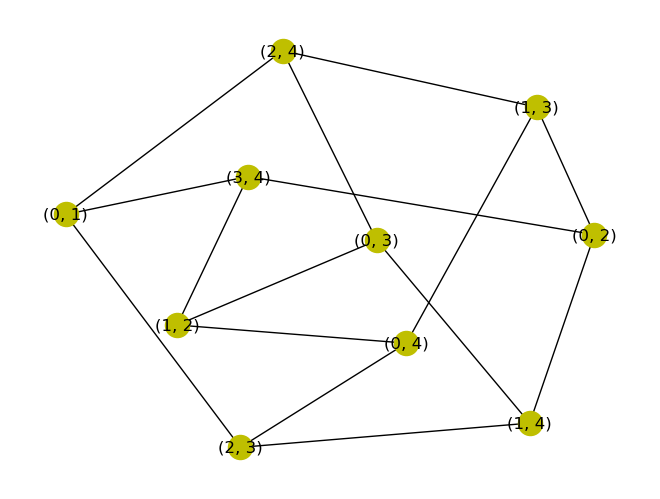

In [59]:
nx.draw(P, **opts)

Even though there is no parameter involved in this example,
it might be worth wrapping the construction up into a `python`
function.

In [60]:
def petersen_graph():
    nodes = combinations(range(5), 2)
    G = nx.Graph()
    for e in combinations(nodes, 2):
        if not set(e[0]) & set(e[1]):
            G.add_edge(*e)
    return G

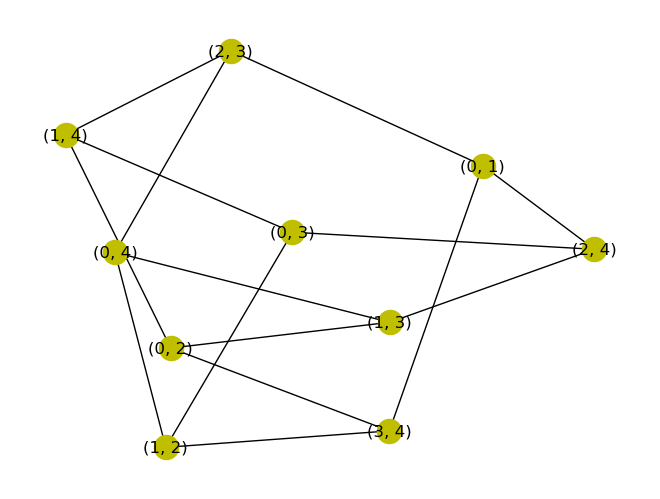

In [61]:
nx.draw(petersen_graph(), **opts)

##  Code Corner

### `python`

* **list unpacking** operator `*e`: if `e` is a list, an
argument `*e` passes the elements of `e` as individual arguments
to a function call.

* **dictionary unpacking** operator `**opts`: `python` function calls take **positional** arguments and **keyword** arguments. The keyword arguments can be collected in a dictionary `opts` (with the keywords as keys).  This dictionary can then be passed into the function call in its "unwrapped" form `**opts`.

* **set intersection**: if `a` and `b` are sets then `a & b` represents the intersection of `a` and `b`.  In a boolean context, an empty set counts as `False`, and a non-empty set as `True`.

In [62]:
a = set([1,2,3])
b = set([3,4,5])
a & b

{3}

In [63]:
bool({}), bool({3})

(False, True)

* `list` [[doc]](https://docs.python.org/3/library/stdtypes.html#list) turns its argument into a `python` list (if possible).

In [64]:
list("networks")

['n', 'e', 't', 'w', 'o', 'r', 'k', 's']

* **list comprehension** [[doc]](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) allows the construction of new list from old ones
without explicit `for` loops (or `if` statements).

In [65]:
[(x, y) for x in range(4) for y in range(4) if x < y]

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

### `networkx`

* the `read_adjlist` command [[doc]](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.adjlist.read_adjlist.html#networkx.readwrite.adjlist.read_adjlist) constructs a graph from a text file in `adj` format.

* `Graph` constructor and applicable methods [[doc]](https://networkx.org/documentation/stable/reference/classes/graph.html): if `G` is  `Graph` object then
  * `G.nodes` returns the nodes of a graph `G` (as an iterator),
  * `G.edges` returns the edges of a graph `G` (as an iterator),
  * ...

* `complete_graph` [[doc]](https://networkx.org/documentation/stable//reference/generated/networkx.generators.classic.complete_graph.html)

### `itertools`

* `combinations` [[doc]](https://docs.python.org/3/library/itertools.html#itertools.combinations) returns the $k$-element combinations of a given list (as an iterator).

In [66]:
print(["".join(c) for c in combinations("networks", 2)])

['ne', 'nt', 'nw', 'no', 'nr', 'nk', 'ns', 'et', 'ew', 'eo', 'er', 'ek', 'es', 'tw', 'to', 'tr', 'tk', 'ts', 'wo', 'wr', 'wk', 'ws', 'or', 'ok', 'os', 'rk', 'rs', 'ks']
